In [1]:
import numpy as np
import control
from control.matlab import *
import matplotlib.pyplot as plt

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
# plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams['axes.labelsize']=14
plt.rcParams['xtick.labelsize']=11
plt.rcParams['ytick.labelsize']=11
plt.rcParams['axes.grid']=True
plt.rcParams['axes.xmargin']=0

In [2]:
perturbation = 0.0
data = {}

data['num_1'] = np.float32(1) * (1.0 + perturbation * np.random.uniform(-1.0, 1.0))
# data['num_2'] = np.float32(0) * (1.0 + perturbation * np.random.uniform(-1.0, 1.0))
data['den_1'] = np.float32(1) * (1.0 + perturbation * np.random.uniform(-1.0, 1.0))
data['den_2'] = np.float32(3) * (1.0 + perturbation * np.random.uniform(-1.0, 1.0))
data['den_3'] = np.float32(2) * (1.0 + perturbation * np.random.uniform(-1.0, 1.0))
 
num = [data['num_1']]
den = [data['den_1'], data['den_2'], data['den_3']]

# num = [1]
# den = [1, 3, 2]
ts = 1e-2; fs = 1/ts
s = tf('s')
z = tf([1, 0], [1], dt=ts)
G_continuous = tf(num,den)
G = c2d(G_continuous, ts, 'matched')

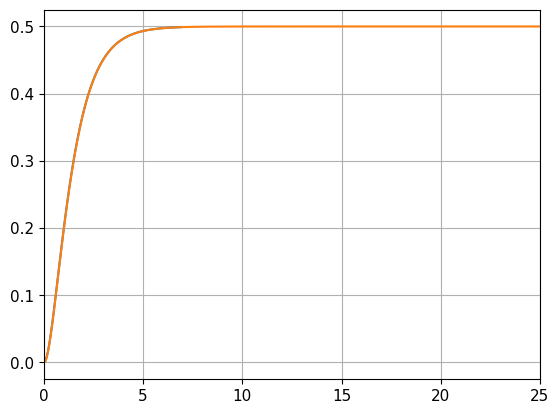

In [3]:
plt.plot(step(G_continuous)[1], step(G_continuous)[0])
plt.plot(step(G)[1], step(G)[0])
plt.show()

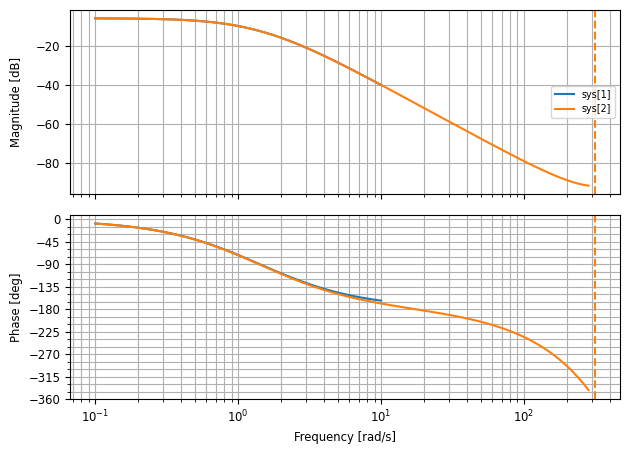

In [4]:
bode(G_continuous)
bode(G)
# bode(G_proper)
plt.show()

In [5]:
from utils import prbs, random_signal
T = 20
t = np.arange(0, T, ts)
u = np.random.normal(0, 1000, t.shape)

y, _, x = lsim(G, u, t, return_x=True)

/home/rbusetto/.virtualenvs/sysid-transformers-control/lib/python3.10/site-packages/control/timeresp.py:1003: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  warnings.warn(


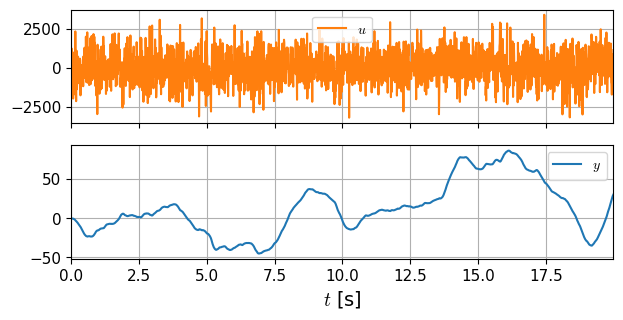

In [6]:
fig = plt.figure(figsize=(7, 5))
ax1 = plt.subplot(311)
#plt.plot(t_CL, r)
plt.plot(t, u, label="$u$", c='tab:orange')
plt.legend()
# plt.xlim([0, 0.43])
# plt.ylim([0, 10])
plt.tick_params('x', labelbottom=False)

ax2 = plt.subplot(312, sharex=ax1)
plt.plot(t, y, label="$y$", c='tab:blue', alpha=1)
plt.xlabel("$t$ [s]")
plt.legend()
# plt.ylim([-500, 2000])
# plt.tick_params('x', labelbottom=False)

In [7]:
# from u_estimate import u_estimate
# U = u_estimate(u, ts)

In [8]:
# VRFT
s = tf('s')
tau = 1 # s
M = 1/(1 + (tau/(2*np.pi))*s)
M = c2d(M, ts, 'matched')
# M = M*(1 + 1e-2*(tau/(2*np.pi))*s) # add a high freq zero for inversion
W = 1/(1 + (10*tau/(2*np.pi))*s)
W = c2d(W, ts, 'matched')

L = M# minreal( minreal((1 - M)*M)*minreal(W*U**-1) )

B=[tf([1],[1],ts),
   tf(ts*np.array([1, 1]),2*np.array([1, -1]),ts),
   tf(np.array([2, -2]),ts*np.array([3, -1]),ts)]

In [9]:
from VRFT_ry import VRFT_ry
theta, C = VRFT_ry(u, y, M, B)

In [10]:
plt.plot(t_CL, r, color='k', linewidth=0.5, label='$r$')
plt.plot(t_CL, y_cl, label=r'$y^{\mathrm{VRFT}}$')
plt.plot(t_CL, y_d, color='r', linestyle='--', label='$y_d$')
plt.xlabel("$t$ [s]")
plt.ylabel("$y$ [-]")
plt.legend()
plt.margins(x=0)
plt.show()

NameError: name 't_CL' is not defined